In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_all = []
data = []
with open("data/myspace.csv") as f:
    read = csv.reader(f)
    for row in read:
        data_all.append(row)
        data.append(int(row[1]))

data = np.array(data)
print(len(data_all))

480


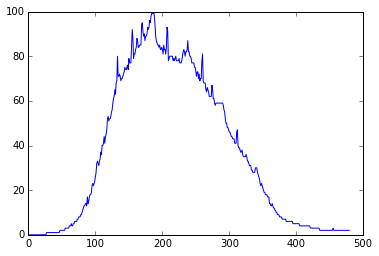

In [14]:
plt.plot(data)

In [ ]:
np.sum(data)

In [4]:
fake_data = []
v = 0
for h in data:
    if h != 0:
        for i in range(h):
            fake_data.append(v)
            
    v += 1

In [ ]:
len(fake_data)

In [233]:
dd = np.asarray(fake_data)

def delta_1(ka, d, N):
    k = ka[0]
    a = ka[1]
    
    d_a = d/a
    
    del_k = N/k - N*np.log(a) + np.sum(np.log(d)) - np.sum(np.power(d_a, k) * d_a)
    del_a = (k/a) * np.sum(np.power(d_a, k) - N)
    
    return np.array([1*del_k, 1*del_a])

def delta_2(ka, d, N):
    k = ka[0]
    a = ka[1]
    
    d_a = d/a
    
    del2_k = -(N/(k*k)) - np.sum(np.power(d_a, k) * np.power(np.log(d_a), 2))
    del2_a = (k/a*a) * (N - (k + 1) * np.sum(np.power(d_a, k)))
    del2_ka = (1/a) * np.sum(np.power(d_a, k)) + (k/a) * np.sum(np.power(d_a, k) * np.log(d_a)) - N/a
    
    return np.array([[del2_k, del2_ka], [del2_ka, del2_a]])

def fit_weibull(data):
    N = data.size
    ka = np.array([1, 1])
    
    ka_err = np.array([np.inf, np.inf])
    thresh = np.zeros(2)
    max_iter = 3
    i = 0
    
    while not(np.allclose(ka_err, thresh)) and i < max_iter:
        i += 1
        
        del_1 = delta_1(ka, data, N)
        del_2 = delta_2(ka, data, N)
        
        ka_new = ka - np.dot(np.linalg.inv(del_2), del_1)
        
#         if np.any(np.isnan(ka_new)):
        print(i)
        print(del_1)
        print(del_2)
#             break
#         else:
        print(ka_new)
#             pass
        
        ka_err = np.abs(ka - ka_new)
        ka = ka_new
    
    print(i)
    return ka

In [234]:
k, a = fit_weibull(dd)
print(k, a)

1
[ -9.13094918e+08  -2.95282277e+08]
[[ -1.11876118e+08   2.42346164e+07]
 [  2.42346164e+07  -7.51385100e+06]]
[ -54.33635531 -216.7761607 ]
2
[ nan  nan]
[[ nan  nan]
 [ nan  nan]]
[ nan  nan]
3
[ nan  nan]
[[ nan  nan]
 [ nan  nan]]
[ nan  nan]
3
nan nan


/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in power
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in power
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in power
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in log
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in power
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in power
/Users/myrmidon/.co

In [9]:
from scipy.stats import exponweib

(2.4959711134161715, 2.0386235428321928, -0.34491745771342963, 178.82056826101942)


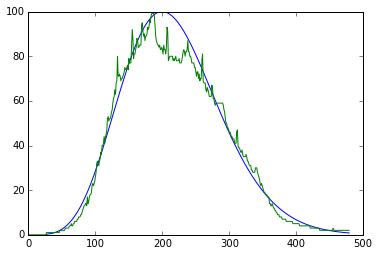

In [186]:
ff = exponweib.fit(dd, 2, 3, scale=1, loc=0)
print(ff)
df = exponweib.pdf(dd, *ff)
plt.plot(dd, data.max()*df/df.max())
plt.plot(data)
# _ = plt.hist(dd, bins=np.linspace(0, dd.max(), data.size), histtype='step', normed=True)

***

In [83]:
def weib_pdf(data, k, a):
    return (k/a) * np.power(data/a, (k-1)) * np.exp(-(np.power(data/a, k)))

In [87]:
d = np.arange(1, dd.max())

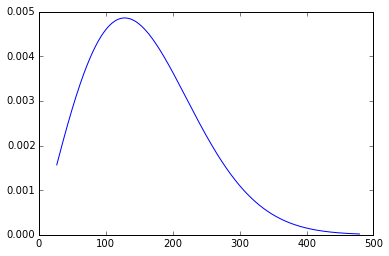

In [237]:
plt.plot(dd, weib_pdf(dd, 2.0386235428321928, 178.82056826101942))

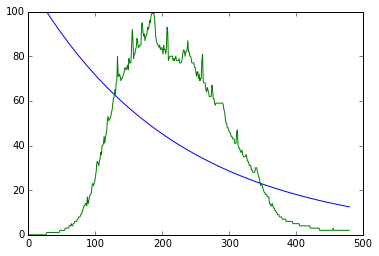

In [185]:
epf = exponweib.pdf(dd, 1, 1, k, a)
plt.plot(dd, 100 * epf/epf.max())
plt.plot(data)